# proposal
gather data from film databasees to demonstrate which genre/writters/directors/actors in films are most profiatble at the box office, over a relatively short period of time

In [1]:
#pandas for reading data and converting them to DataFrameds for using Dataframe methods. 
#numpy and scipy for calculating said data
import pandas as pd
import numpy as np
import scipy as sp
#create graphs of the data that has been analyzed
import matplotlib.pyplot as plt
#make said graphs "prettier" and more enjoyable to read
import seaborn as sns
#view matplots in this notebook
%matplotlib inline

i need to gather films that were highest grossing at the box office. and if available, the names of directors, writters and actors in said films. and just to make sure my biases arent effecting the data too much, the rating for each film. 

after doing the below steps, i will go back to the origional data to see if there are other correlations

1) read all available databases and see what data is inside
2) covert to pandas Dataframes and remove columns that are not part of my hypothesis. 
3) join dataframes based on film title and get average rating
4) make four dataframes, one joined based on genre, one on writters, one on directors, one on actors, and make graphs
    for each based on pearson correlation, and see which has the highest correlation
    
the tables available *Box Office Mojo* database with gross revenue
*IMDB* databases with movie title, actors, directors, writters seperate tables

i will need to join those tables and order them by titles


after looking through all the databases and finding missing titles that were definitely profitable, i have decided to use
a joined table of The Numbers databse, and Watch Mojo database as the main database, and then join to it and compare against it

In [2]:
imdb_film_title = pd.read_csv("unzipped-data/imdb.title.basics.csv")
imdb_film_title.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [3]:
box_mojo_gross = pd.read_csv("unzipped-data/bom.movie_gross.csv")
box_mojo_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [4]:
people_involved_profession_relatedTitles = pd.read_csv("unzipped-data/imdb.name.basics.csv")
people_involved_profession_relatedTitles.head(2)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [5]:
film_title_crew_reference_index = pd.read_csv("unzipped-data/imdb.title.crew.csv")
film_title_crew_reference_index.head(2)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


In [6]:
job_title_category_index = pd.read_csv("unzipped-data/imdb.title.principals.csv")
job_title_category_index.head(2)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN


In [7]:
imdb_ratings_index = pd.read_csv("unzipped-data/imdb.title.ratings.csv")
imdb_ratings_index.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
the_numbers_gross = pd.read_csv("unzipped-data/tn.movie_budgets.csv")
the_numbers_gross.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [9]:
the_numbers_gross['domestic_gross'] = the_numbers_gross['domestic_gross'].str.replace(r'\D', '').astype(int)

C:\Users\yonic\AppData\Local\Temp/ipykernel_12560/566704501.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  the_numbers_gross['domestic_gross'] = the_numbers_gross['domestic_gross'].str.replace(r'\D', '').astype(int)


In [10]:
the_numbers_gross['production_budget'] = the_numbers_gross['production_budget'].str.replace(r'\D', '').astype(int)

C:\Users\yonic\AppData\Local\Temp/ipykernel_12560/1828636146.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  the_numbers_gross['production_budget'] = the_numbers_gross['production_budget'].str.replace(r'\D', '').astype(int)


In [11]:
the_numbers_gross['worldwide_gross'] = the_numbers_gross['worldwide_gross'].str.replace(r'\D', '').astype(float)

C:\Users\yonic\AppData\Local\Temp/ipykernel_12560/2739544300.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  the_numbers_gross['worldwide_gross'] = the_numbers_gross['worldwide_gross'].str.replace(r'\D', '').astype(float)


In [12]:
the_numbers_gross['worldwide_gross'] = the_numbers_gross['worldwide_gross'].astype(int)

In [13]:
box_mojo_gross = box_mojo_gross.rename(columns={'title': 'movie'})

In [14]:
box_mojo_gross['movie'] = box_mojo_gross['movie'].astype(str)

In [15]:
the_numbers_gross['movie'] = the_numbers_gross['movie'].astype(str)

In [16]:
box_mojo_gross['movie']
# the_numbers_gross['movie'].value_counts()

0                                       Toy Story 3
1                        Alice in Wonderland (2010)
2       Harry Potter and the Deathly Hallows Part 1
3                                         Inception
4                               Shrek Forever After
                           ...                     
3382                                      The Quake
3383                    Edward II (2018 re-release)
3384                                       El Pacto
3385                                       The Swan
3386                              An Actor Prepares
Name: movie, Length: 3387, dtype: object

In [17]:
mojo_numbers = pd.concat([box_mojo_gross, the_numbers_gross])

In [18]:
mojo_numbers.loc[mojo_numbers['movie'] == 'Jurassic Park']

,movie,studio,domestic_gross,foreign_gross,year,id,release_date,production_budget,worldwide_gross
824,Jurassic Park,NaN,395708305.0,NaN,NaN,25.0,"Jun 11, 1993",63000000.0,1.038813e+09


In [19]:
mojo_numbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9169 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              9169 non-null   object 
 1   studio             3382 non-null   object 
 2   domestic_gross     9141 non-null   float64
 3   foreign_gross      2037 non-null   object 
 4   year               3387 non-null   float64
 5   id                 5782 non-null   float64
 6   release_date       5782 non-null   object 
 7   production_budget  5782 non-null   float64
 8   worldwide_gross    5782 non-null   float64
dtypes: float64(5), object(4)
memory usage: 716.3+ KB


In [20]:
some_profit = mojo_numbers.loc[(mojo_numbers['domestic_gross'] - mojo_numbers['production_budget']) > 1]
some_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2677 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2677 non-null   object 
 1   studio             0 non-null      object 
 2   domestic_gross     2677 non-null   float64
 3   foreign_gross      0 non-null      object 
 4   year               0 non-null      float64
 5   id                 2677 non-null   float64
 6   release_date       2677 non-null   object 
 7   production_budget  2677 non-null   float64
 8   worldwide_gross    2677 non-null   float64
dtypes: float64(5), object(4)
memory usage: 209.1+ KB


In [21]:
some_profit = some_profit.drop(columns=['studio', 'foreign_gross', 'year'])
some_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2677 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2677 non-null   object 
 1   domestic_gross     2677 non-null   float64
 2   id                 2677 non-null   float64
 3   release_date       2677 non-null   object 
 4   production_budget  2677 non-null   float64
 5   worldwide_gross    2677 non-null   float64
dtypes: float64(4), object(2)
memory usage: 146.4+ KB


In [22]:
imdb_mojo_numbers = pd.concat([mojo_numbers, imdb_film_title])

In [23]:
imdb_mojo_numbers['domestic_profit'] = imdb_mojo_numbers['domestic_gross'] - imdb_mojo_numbers['production_budget']
imdb_mojo_numbers['intnl_profit'] = imdb_mojo_numbers['worldwide_gross'] - imdb_mojo_numbers['production_budget']
imdb_mojo_numbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155313 entries, 0 to 146143
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie              9169 non-null    object 
 1   studio             3382 non-null    object 
 2   domestic_gross     9141 non-null    float64
 3   foreign_gross      2037 non-null    object 
 4   year               3387 non-null    float64
 5   id                 5782 non-null    float64
 6   release_date       5782 non-null    object 
 7   production_budget  5782 non-null    float64
 8   worldwide_gross    5782 non-null    float64
 9   tconst             146144 non-null  object 
 10  primary_title      146144 non-null  object 
 11  original_title     146123 non-null  object 
 12  start_year         146144 non-null  float64
 13  runtime_minutes    114405 non-null  float64
 14  genres             140736 non-null  object 
 15  domestic_profit    5782 non-null    float64
 16  in

In [24]:
top_gross = imdb_mojo_numbers.sort_values('domestic_profit', ascending=False)
top_hundred = top_gross.head(100)
top_gross.head(8)

,movie,studio,domestic_gross,foreign_gross,year,id,release_date,production_budget,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,domestic_profit,intnl_profit
5,Star Wars Ep. VII: The Force Awakens,NaN,936662225.0,NaN,NaN,6.0,"Dec 18, 2015",306000000.0,2.053311e+09,NaN,NaN,NaN,NaN,NaN,NaN,630662225.0,1.747311e+09
41,Black Panther,NaN,700059566.0,NaN,NaN,42.0,"Feb 16, 2018",200000000.0,1.348258e+09,NaN,NaN,NaN,NaN,NaN,NaN,500059566.0,1.148258e+09
42,Titanic,NaN,659363944.0,NaN,NaN,43.0,"Dec 19, 1997",200000000.0,-2.147484e+09,NaN,NaN,NaN,NaN,NaN,NaN,459363944.0,-2.347484e+09
3464,Star Wars Ep. IV: A New Hope,NaN,460998007.0,NaN,NaN,65.0,"May 25, 1977",11000000.0,7.865980e+08,NaN,NaN,NaN,NaN,NaN,NaN,449998007.0,7.755980e+08
33,Jurassic World,NaN,652270625.0,NaN,NaN,34.0,"Jun 12, 2015",215000000.0,1.648855e+09,NaN,NaN,NaN,NaN,NaN,NaN,437270625.0,1.433855e+09
3525,ET: The Extra-Terrestrial,NaN,435110554.0,NaN,NaN,26.0,"Jun 11, 1982",10500000.0,7.929653e+08,NaN,NaN,NaN,NaN,NaN,NaN,424610554.0,7.824653e+08
43,Incredibles 2,NaN,608581744.0,NaN,NaN,44.0,"Jun 15, 2018",200000000.0,1.242521e+09,NaN,NaN,NaN,NaN,NaN,NaN,408581744.0,1.042521e+09
26,The Avengers,NaN,623279547.0,NaN,NaN,27.0,"May 4, 2012",225000000.0,1.517936e+09,NaN,NaN,NaN,NaN,NaN,NaN,398279547.0,1.292936e+09


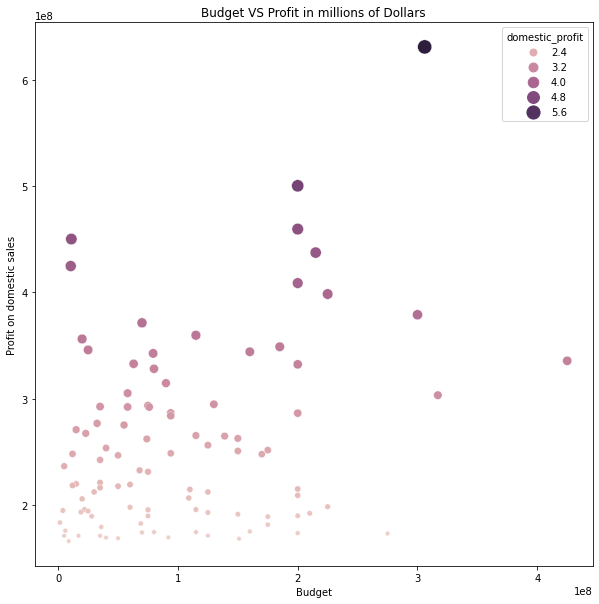

In [25]:
plt.figure(figsize=[10, 10])
sns.scatterplot(data=top_hundred, 
                x='production_budget', 
                y='domestic_profit', 
                hue='domestic_profit',
                size='domestic_profit',
                sizes=(20, 200))
plt.title("Budget VS Profit in millions of Dollars")
plt.xlabel("Budget")
plt.ylabel("Profit on domestic sales");

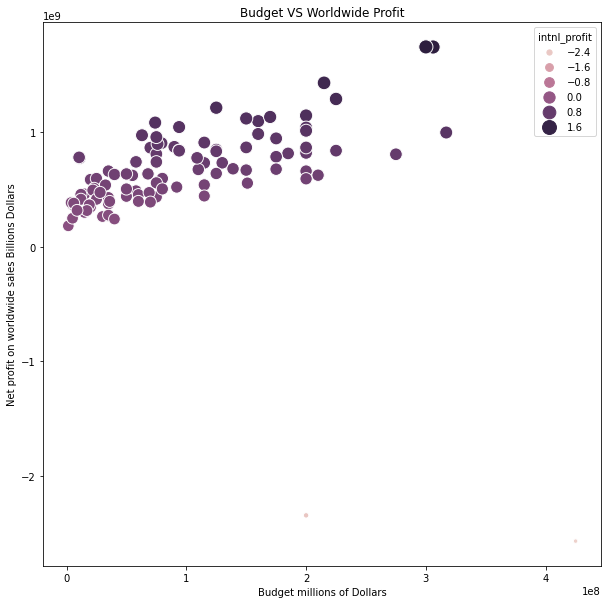

In [26]:
plt.figure(figsize=[10, 10])
sns.scatterplot(data=top_hundred, 
                x='production_budget', 
                y='intnl_profit', 
                hue='intnl_profit',
                size='intnl_profit',
                sizes=(20, 200))
plt.title("Budget VS Worldwide Profit")
plt.xlabel("Budget millions of Dollars")
plt.ylabel("Net profit on worldwide sales Billions Dollars");

In [27]:
standev_dom = round(top_gross['domestic_profit'].std(), 0)
standev_dom

49921366.0

In [28]:
better_than_avg_dom = top_gross.loc[top_gross['domestic_profit'] > standev_dom]
better_than_avg_dom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 5 to 270
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              637 non-null    object 
 1   studio             0 non-null      object 
 2   domestic_gross     637 non-null    float64
 3   foreign_gross      0 non-null      object 
 4   year               0 non-null      float64
 5   id                 637 non-null    float64
 6   release_date       637 non-null    object 
 7   production_budget  637 non-null    float64
 8   worldwide_gross    637 non-null    float64
 9   tconst             0 non-null      object 
 10  primary_title      0 non-null      object 
 11  original_title     0 non-null      object 
 12  start_year         0 non-null      float64
 13  runtime_minutes    0 non-null      float64
 14  genres             0 non-null      object 
 15  domestic_profit    637 non-null    float64
 16  intnl_profit       637 non

### now we have a list of movies that performed better than average financially.
lets see how it matches up with IMDB ratings


In [40]:
# need to get the list of movies associated with each person in the involved person
# dataframe, but its a string.
# i need tto turn each one into a list, loop through each list and see if it contains one of the
# tconst values from the top_hundred dataframe. if it does, i need to put the row of the related people_involved
# in a new dataframe to put in a plot
people_involved_profession_relatedTitles['known_for_titles'] = people_involved_profession_relatedTitles['known_for_titles'].astype(str)
people_involved_profession_relatedTitles['known_for_titles'] = people_involved_profession_relatedTitles['known_for_titles'].apply(lambda x: x[1: -1].split(','))

#now i need to get 
people_involved_profession_relatedTitles.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","[t0837562, tt2398241, tt0844471, tt011855]"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","[t0896534, tt6791238, tt0287072, tt168294]"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","[t1470654, tt0363631, tt0104030, tt010289]"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","[t0114371, tt2004304, tt1618448, tt122438]"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","[t0452644, tt0452692, tt3458030, tt217825]"


In [41]:
people_involved_profession_relatedTitles['known_for_titles']

0         [t0837562, tt2398241, tt0844471, tt011855]
1         [t0896534, tt6791238, tt0287072, tt168294]
2         [t1470654, tt0363631, tt0104030, tt010289]
3         [t0114371, tt2004304, tt1618448, tt122438]
4         [t0452644, tt0452692, tt3458030, tt217825]
                             ...                    
606643                                           [a]
606644                          [t9090932, tt873713]
606645                          [t8734436, tt961561]
606646                                           [a]
606647                                     [t874318]
Name: known_for_titles, Length: 606648, dtype: object

In [42]:
people_involved_profession_relatedTitles = people_involved_profession_relatedTitles.explode('known_for_titles')

In [43]:
people_involved_profession_relatedTitles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668464 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   nconst              1668464 non-null  object 
 1   primary_name        1668464 non-null  object 
 2   birth_year          319321 non-null   float64
 3   death_year          24574 non-null    float64
 4   primary_profession  1600661 non-null  object 
 5   known_for_titles    1668464 non-null  object 
dtypes: float64(2), object(4)
memory usage: 89.1+ MB


In [44]:
people_involved_profession_relatedTitles['known_for_titles']

0          t0837562
0         tt2398241
0         tt0844471
0          tt011855
1          t0896534
            ...    
606644     tt873713
606645     t8734436
606645     tt961561
606646            a
606647      t874318
Name: known_for_titles, Length: 1668464, dtype: object

In [45]:
pep_in_pop = .loc[people_involved_profession_relatedTitles['known_for_titles'].isin(imdb_mojo_numbers['tconst'])]
pep_in_pop.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 263382 entries, 0 to 606628
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              263382 non-null  object 
 1   primary_name        263382 non-null  object 
 2   birth_year          46442 non-null   float64
 3   death_year          1715 non-null    float64
 4   primary_profession  260546 non-null  object 
 5   known_for_titles    263382 non-null  object 
dtypes: float64(2), object(4)
memory usage: 14.1+ MB


In [46]:
pep_in_pop['nconst'].value_counts()

nm1202937    3
nm5923758    3
nm9980896    2
nm4245836    2
nm4090185    2
            ..
nm2126153    1
nm2129610    1
nm2130505    1
nm2134432    1
nm4183833    1
Name: nconst, Length: 205348, dtype: int64

In [47]:
shows_often = pep_in_pop.groupby("primary_name").filter(lambda x: len(x) > 1)
shows_often

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department",tt2004304
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department",tt1618448
39,nm0074009,Richard Berge,NaN,NaN,"producer,miscellaneous,writer",tt1990352
39,nm0074009,Richard Berge,NaN,NaN,"producer,miscellaneous,writer",tt5278460
41,nm0075049,Urban Bergsten,NaN,NaN,"actor,writer,director",tt2256570
...,...,...,...,...,...,...
606473,nm9737150,Louise Labeque,NaN,NaN,actress,tt6858020
606573,nm9937856,Donny Pangilinan,NaN,NaN,actor,tt8629308
606573,nm9937856,Donny Pangilinan,NaN,NaN,actor,tt8723270
606628,nm9980896,Rama Narayanan,NaN,NaN,"director,writer",tt8715016


In [48]:
valid_people = pep_in_pop.loc[pep_in_pop['primary_profession'].notna()]

In [49]:
imdb_mojo_numbers.drop(columns=['release_date', 'year', 'start_year', 'runtime_minutes'])

,movie,studio,domestic_gross,foreign_gross,id,production_budget,worldwide_gross,tconst,primary_title,original_title,genres,domestic_profit,intnl_profit
0,Toy Story 3,BV,415000000.0,652000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shrek Forever After,P/DW,238700000.0,513900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,Drama,NaN,NaN
146140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary,NaN,NaN
146141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt9916706,Dankyavar Danka,Dankyavar Danka,Comedy,NaN,NaN
146142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt9916730,6 Gunn,6 Gunn,NaN,NaN,NaN


In [50]:
valid_people = valid_people.join(imdb_mojo_numbers['domestic_gross'])

In [51]:
valid_people = valid_people.loc[valid_people['primary_profession'].notna()]

In [52]:
actors = valid_people.loc[valid_people['primary_profession'].str.contains('act')]
actors

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,domestic_gross
24,nm0069131,Gregg Bello,NaN,NaN,"actor,producer",tt5109784,95300000.0
24,nm0069131,Gregg Bello,NaN,NaN,"actor,producer",tt5109784,172558876.0
24,nm0069131,Gregg Bello,NaN,NaN,"actor,producer",tt5109784,NaN
25,nm0069225,Gavin Bellour,NaN,NaN,"actor,producer,composer",tt2040257,67600000.0
25,nm0069225,Gavin Bellour,NaN,NaN,"actor,producer,composer",tt2040257,169368427.0
...,...,...,...,...,...,...,...
606573,nm9937856,Donny Pangilinan,NaN,NaN,actor,tt8723270,NaN
606578,nm9942317,Fiona Hardy,NaN,NaN,actress,tt8765666,NaN
606581,nm9943777,Jeremy Bradshaw,NaN,NaN,"actor,cinematographer,producer",tt8865220,NaN
606593,nm9951829,Hsin-Yen Hsu,NaN,NaN,actress,tt9174800,NaN


In [53]:
actors['nconst'].value_counts()

nm0628664    6
nm0235253    6
nm0862286    6
nm0444298    6
nm1062134    6
            ..
nm1241156    1
nm1237419    1
nm1237215    1
nm1235553    1
nm9958501    1
Name: nconst, Length: 104890, dtype: int64

##  how many unique people in each movie
from the `job_title_category_index` database

In [54]:
jobs_in_pop_mov = job_title_category_index.loc[job_title_category_index['tconst'].isin(top_gross['tconst'])]
jobs_in_pop_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 54.9+ MB


In [55]:
jobs_in_pop_mov.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [56]:
writers = valid_people.loc[valid_people['primary_profession'].str.contains('writer')]

In [57]:
writers

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,domestic_gross
23,nm0068874,Hava Kohav Beller,NaN,NaN,"director,writer,producer",tt7701650,118300000.0
23,nm0068874,Hava Kohav Beller,NaN,NaN,"director,writer,producer",tt7701650,200120000.0
23,nm0068874,Hava Kohav Beller,NaN,NaN,"director,writer,producer",tt7701650,NaN
39,nm0074009,Richard Berge,NaN,NaN,"producer,miscellaneous,writer",tt1990352,84800000.0
39,nm0074009,Richard Berge,NaN,NaN,"producer,miscellaneous,writer",tt1990352,218080025.0
...,...,...,...,...,...,...,...
606458,nm9722778,Bobby Vemuri,NaN,NaN,"assistant_director,writer",tt6543384,NaN
606500,nm9760278,Niklas Hoffmann,NaN,NaN,"writer,director,sound_department",tt3743088,NaN
606523,nm9781362,Grzegorz Jankowski,NaN,NaN,"director,writer,producer",tt1674050,NaN
606628,nm9980896,Rama Narayanan,NaN,NaN,"director,writer",tt8715016,NaN


In [58]:
directors = valid_people.loc[valid_people['primary_profession'].str.contains('direct')]

In [61]:
directors = directors.loc[directors['domestic_gross'].notna()]

In [66]:
directors['domestic_gross'] = directors['domestic_gross'].astype(int)

C:\Users\yonic\AppData\Local\Temp/ipykernel_25124/3859521832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directors['domestic_gross'] = directors['domestic_gross'].astype(int)


In [75]:
directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 23 to 5780
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nconst              1215 non-null   object 
 1   primary_name        1215 non-null   object 
 2   birth_year          468 non-null    float64
 3   death_year          13 non-null     float64
 4   primary_profession  1215 non-null   object 
 5   known_for_titles    1215 non-null   object 
 6   domestic_gross      1215 non-null   int32  
dtypes: float64(2), int32(1), object(4)
memory usage: 71.2+ KB


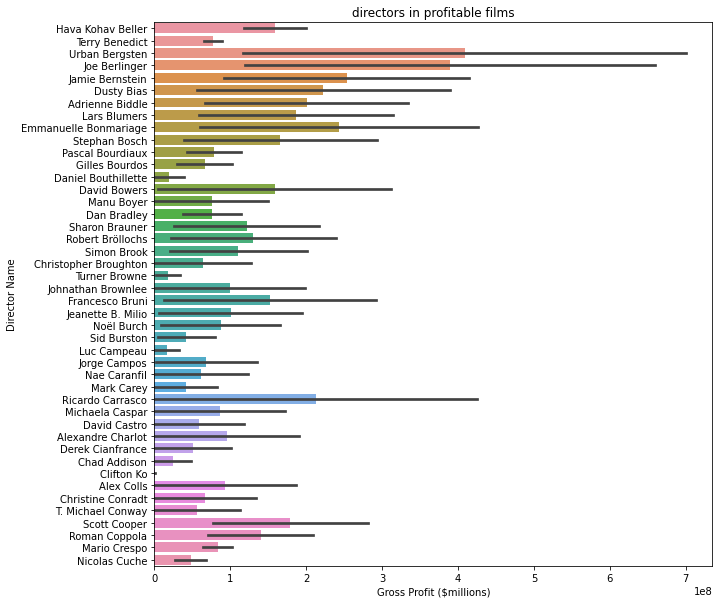

In [83]:
# profit_direct = directors.loc[directors['domestic_gross'] > 1]
# profit_direct.sort_values('domestic_gross', inplace=True)
top_hund_direct = directors.head(100)
plt.figure(figsize=[10, 10])
sns.barplot(data=top_hund_direct, x='domestic_gross', y='primary_name')
plt.title("directors in profitable films")
plt.xlabel('Gross Profit ($millions)')
plt.ylabel('Director Name');

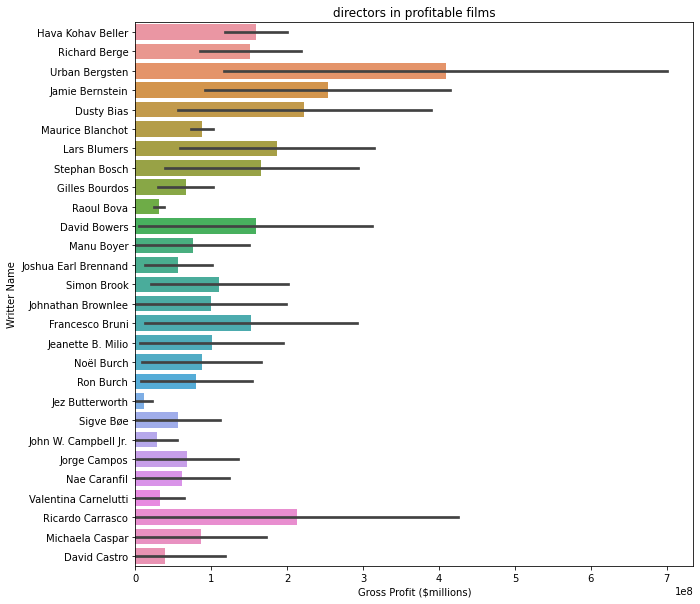

In [85]:
# profit_direct = directors.loc[directors['domestic_gross'] > 1]
# profit_direct.sort_values('domestic_gross', inplace=True)
top_hund_writ = writers.head(100)
plt.figure(figsize=[10, 10])
sns.barplot(data=top_hund_writ, x='domestic_gross', y='primary_name')
plt.title("directors in profitable films")
plt.xlabel('Gross Profit ($millions)')
plt.ylabel('Writter Name');